# Introduction to Numerical Methods in Macroeconomics and Python

## Numerical Methods: what are they and why do we need them

In Macroeconomics we are often asked to solve for the equilibrium of a model.
A model consists of a system of (often nonlinear) equations in some unknowns.
Because of nonlinearities, it is often difficult or impossible to obtain closed-form solutions.
We do not want to keep talking about models we can solve analytically, because that would be quite a restricted set of models.
Therefore, we need numerical methods to explore the solutions to complicated models.

These TA sessions focus on exploring some popular numerical methods that are useful in Macroeconomics.
We will focus on discrete-time models, as these present non-trivial challenges relative to models in continuous-time.

Broadly speaking, we can categorize solutions methods in two families:

- perturbation methods; and
- projection methods.

### Perturbation methods

For nonlinear models that feature smooth functions, we can get fast and efficient solutions by approximating the system of equations around some specific point.
We can write any rational-expectations model in the following way:
$$
f \left( X_{t-1}, X_{t}, X_{t+1} \right) = 0,
$$
where I assumed that the model is deterministic.
Stochastic models with rational expectations are similarly written (notably with an expectation operator), and are similarly treated.
The solution to such a system of equations (assuming it exists and it is unique) is written as
$$
X_{t+1} = g \left( X_{t}, X_{t-1} \right),
$$
where $g(\cdot)$ is a set of policy functions.

What we can do with such a system is to take a Taylor expansion of $f(\cdot)$ around a point.
It is common to consider the first-order approximation (denote it with $\hat{f}$) around the deterministic steady state of the model.
Instead of solving $f=0$, we can solve $\hat{f}=0$.
As this new system is linear, we know we can easily solve it: the solution will be a linear policy function $\hat{g}$ that will hold only in an arbitrary (small) neighborhood of the steady state.

For example, we know how to analytically solve the textbook version of the RBC model with full capital depreciation (i.e., $\delta=1$).
If $\delta \neq 1$, then we need to use numerical methods.

In this course, we will not deal with perturbation methods.
We will go hands-on with them in the next Macro course.

If we introduce discontinuities or non-differentiable equations in the model (e.g., borrowing constraints or discrete control variables), we cannot reliably take the Taylor expansion of a model.
This justifies the interest in projection methods to solve models.

### Projection methods

Projection methods try to force their way through a solution, mostly through a trial-and-error procedure.
The intuition is very similar to the [Newton algorithm](https://en.wikipedia.org/wiki/Newton%27s_method) to find roots of a function: you start with a proposal for the solution and you check if it works.
If it does not, then you use some (educated) criterion to create a new proposal.
You repeat the procedure until you arrive to the solution.

The difficulty in the case of Macroeconomics is that the proposals we are dealing with are not points in a space of scalars, but are points in a space of functions.
This might not be clear at first, as we are going to work with numerical representations of functions.

The clearest application of the projection method is probably the Aiyagari (1994) model.
In such model, we should find a capital-remuneration rate $r_t$ such that all markets (goods, labor, capital) are in equilibrium.
We will see the details in a dedicated TA session, but here is the gist of it.
We enter the $n$-th iteration with a proposal $r_{t}^{(n)}$.
We check if it clears the capital market: 
- if it does not because there is excess demand, we know we should have $r_{t}^{(n+1)} > r_{t}^{(n)}$.
- if it does not because there is excess supply, we know we should have $r_{t}^{(n+1)} < r_{t}^{(n)}$.

A common critique to projection methods is the following: it is often the case that we cannot verify the solution we reach is unique (e.g., sunspots).
So it might happen that you have models where the procedure never converges anywhere, or where the procedure converges to "weird" solutions.
A way to deal with this is to carry out extensive (and sometimes painful) sensitivity analysis.

### Notable, classical examples

- The deterministic Neoclassical Growth Model
- The stochastic Neoclassical Growth Model
- [Huggett (1993)](https://doi.org/10.1016/0165-1889(93)90024-M)
- [Aiyagari (1994)](https://doi.org/10.2307/2118417)
- [Krussell and Smith (1998)](https://doi.org/10.1086/250034)
- [Reiter (2009)](https://doi.org/10.1016/j.jedc.2008.08.010)

## Python

### Introduction

Python is a programming language.
It is not a mathematics-oriented language in and of itself.
It is a general-purpose language, meaning we can do pretty much what we want with it.
Here is a list of what humanity did with Python:

- Dropbox (Source: [Dropbox Blog](https://blogs.dropbox.com/tech/2018/09/how-we-rolled-out-one-of-the-largest-python-3-migrations-ever/))
- Image editing ([The GNU Image Manipulation Program](https://www.gimp.org/))
- Vector graphics ([Inkscape](https://inkscape.org/))
- 3D modeling ([Blender](https://www.blender.org/))
- Desktop publishing ([Scribus](https://www.scribus.net/))
- Web pages ([Reddit](https://www.reddit.com/), Source: [Reddit Blog](https://redditblog.com/2005/12/05/on-lisp/))

We could spend ages trying to understand all the details on how Python works, and it is very easy for me to get lost in technical explanations.
Instead, let's have a look at the very simple things Python allows us to do.

In [1]:
2 + 1 - 7

-4

In [2]:
3 * 2 / 4

1.5

In [3]:
print('Hello world!')

Hello world!


In [4]:
print("'This' is a string")

'This' is a string


In [5]:
print('The Answer to the Ultimate Question of Life, The Universe, and Everything is 6 * 9 = 42 (although 6 * 9 = {})'.format(6*9))

The Answer to the Ultimate Question of Life, The Universe, and Everything is 6 * 9 = 42 (although 6 * 9 = 54)


In [6]:
print('This ---> {}\nis a list'.format(['a', 'b', 'c']))

This ---> ['a', 'b', 'c']
is a list


In [7]:
print('This ---> {}\nis a tuple'.format(('a', 'b', 'c')))

This ---> ('a', 'b', 'c')
is a tuple


In [8]:
print('This ---> {}\nis a dictionary'.format({'a': 1, 'b': 2, 'c': 3}))

This ---> {'a': 1, 'b': 2, 'c': 3}
is a dictionary


### The need for modules

Modules are sets of functions and classes that are oriented towards a given goal.
Say you have a bunch of functions that altogether serve one purpose (e.g., connect to a website and download stuff acccording to some criteria).
Then your bunch may be collected into a module.
Packages are sets of modules.

Here are some packages we, as economists, will encounter most often:

- `numpy` (N-dimensional arrays)
- `scipy` (mathematics and statistics)
- `pandas` (dataframes, as in R or Stata)
- `matplotlib` (2D plotting)
- `beautifulsoup4` (HTML web scraping)
- `selenium` (Chrome-driven web scraping)
- `bokeh` (interactive data visualization)

How you install these packages in your computer depends on your Operating System.
If you have a Windows or macOS machine, then you are most likely using the Anaconda distribution, which bundles most packages and hence they should already be on your computer.
If you use a Debian-based Linux distribution, you may want to check out your package manager for these modules.

If your package distribution (e.g., Anaconda, APT) does not give you access to a given module, you can use `pip`, which is Python's integrated package manager.

#### How do we use modules/packages?

At the very beginning of your `.py` file, you should include `import` statements.
These statements instruct the Python interpreter to use definitions that are found in those packages.
Note that you can also use shorthands for accessing functions inside modules.

In what follows, we see some notable packages and some of their functions.
The point here is not to teach everything you need about all the packages.
This is just to show minimal working examples, so to get familiar with syntax and some basic functions.

### NumPy

Python does not know what a vector or a matrix are.
The goal of NumPy is to add support for multi-dimensional arrays, together with basic mathematical functions.
In other words, NumPy brings basic Matlab-like functionality to Python.

Here are a few examples of how to use NumPy.

First, we have to tell Python that it has to load the package using an `import` statement.
We also use a shorthand to refer to NumPy functions in upcoming calls.

In [9]:
import numpy as np

Next, we create some arrays from scratch, using the `list` datatype as closest representation to what we want.

In [10]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

This is a one-dimensional vector in NumPy.
It has no concept of row or column.

In [11]:
a.shape

(3,)

We can create two-dimensional arrays where one of the dimensions has size one in order to create row- or column-oriented vectors.

In [12]:
a.reshape([3, 1])

array([[1],
       [2],
       [3]])

In [13]:
a.reshape([1, 3])

array([[1, 2, 3]])

Here we also see how a matrix can be constructed starting from lists.
We do this by nesting lists: the "outermost" list groups rows in the matrix, while the "innermost" list groups elements in each row (effectively characterizing columns).

In [14]:
A = np.array([[100, 200, 300, 400],
              [ 50,  75,- 10,- 15],
              [  9,   8,   7,   6]], dtype=float)
A

array([[100., 200., 300., 400.],
       [ 50.,  75., -10., -15.],
       [  9.,   8.,   7.,   6.]])

Note that I specified the datatype (`dtype`) of all entries of the matrix `A` to be floating point numbers (as opposed to integers).
We can add static typing to our variables to improve performance of our algorithms, so that Python will not have to spend CPU cycles trying to infer the type of objects it is working with.

In [15]:
A.shape

(3, 4)

To access elements within a matrix we use the square brackets.

In [16]:
A[0, 3] = np.nan
A

array([[100., 200., 300.,  nan],
       [ 50.,  75., -10., -15.],
       [  9.,   8.,   7.,   6.]])

Note that indexing in Python is `0`-based: the number `0` represents the first element in an iterable object (e.g., a list, a matrix, etc.).
This means that for a matrix with dimensions `N`-by-`M`, we can refer to specific items using integers ranging from `0` to `N-1` for the rows, from `0` to `M-1` for the columns.

Note that Python supports "backward" indexing:

In [17]:
A[-1, -2]

7.0

The previous command looks for the element in the _last_ row, _second-to-last_ column of `A`.

NumPy supports a number of standard functions to create arrays that are somewhat regular.
Notable examples are empty matrices (`np.empty`), arrays full of zeros (`np.zeros`), arrays full of ones (`np.ones`), linearly, of logarithmically-spaced vectors (`np.linspace` and `np.logspace`), mesh grids (`np.mesh`) and so on.

In [18]:
n = 10+1
xLo = 0
xHi = 2
X = np.linspace(xLo, xHi, n)
X

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

It also provides mathematical functions that Python does not know, such as `np.sqrt`, `np.sin`, `np.log`, etc.

In [19]:
Y = np.sqrt(X)
np.hstack( [ X.reshape([-1, 1]), Y.reshape([-1, 1]) ] )

array([[0.        , 0.        ],
       [0.2       , 0.4472136 ],
       [0.4       , 0.63245553],
       [0.6       , 0.77459667],
       [0.8       , 0.89442719],
       [1.        , 1.        ],
       [1.2       , 1.09544512],
       [1.4       , 1.18321596],
       [1.6       , 1.26491106],
       [1.8       , 1.34164079],
       [2.        , 1.41421356]])

Notably, NumPy also provides functions to draw random variates from known distributions via the `random` sub-package.

For example, to create a `3`-by-`3` matrix where each element is drawn from a $\mathcal{N}(0, 5)$...

In [20]:
B = np.random.normal(loc=0, scale=5, size=(3, 3))
B

array([[  2.25517186,  -4.18875395,   0.73557559],
       [  9.17729834,   2.556632  ,  -4.5785979 ],
       [  1.78841051,  -0.66191155, -10.90860359]])

For now, this is all we need to know: NumPy brings multidimensional arrays and basic mathematical functions to Python, essentially approximating what Matlab can do (without its toolboxes).

However, we're missing mathematical and statistical routines (e.g., root-finding solver, statistical describer for arrays).
This is where SciPy comes in.

### SciPy

SciPy is a package that contains many mathematical and statistical routines.
Examples include
- [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html) (support for [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix))
- [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) (linear algebra tools)
- [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html) (tools dealing with the Fast Fourier Transform)
- [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) (optimization and root-finding routines)
- [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) (statistical functions, including random number generators)
- [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) (interpolation facilities)
- [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) (stuff for signal processing)

It is common to import sub-packages from SciPy rather than importing the upper-level SciPy package.

For example, we can compute the eigenvalues `l` and (left) eigenvectors `v` of the matrix `B`:

In [21]:
from scipy import linalg as la

l, v = la.eig(B)
l

array([  2.4705576 +5.98388207j,   2.4705576 -5.98388207j,
       -11.03791492+0.j        ])

With the `stats` package we can describe arrays:

In [22]:
from scipy import stats as st

st.describe(A)

DescribeResult(nobs=3, minmax=(array([  9.,   8., -10.,  nan]), array([100., 200., 300.,  nan])), mean=array([53.        , 94.33333333, 99.        ,         nan]), variance=array([ 2077.        ,  9496.33333333, 30373.        ,            nan]), skewness=array([0.12040761, 0.3501275 , 0.69954513,        nan]), kurtosis=array([-1.5, -1.5, -1.5,  nan]))

It would be very long and complicated to showcase the functions in SciPy, as there are a lot.
We will rather encounter SciPy functions as we go through the course.
An exhastive list of sub-packages can be found [here](https://docs.scipy.org/doc/scipy/reference/#api-reference).

One thing neither NumPy nor SciPy can do is plotting.
Matplotlib does exactly that.

### Matplotlib

Whenever you have complicated objects in your code, it is quite convenient to visualize them.
Matplotlib provides a way to plot 2D objects, and is of (limited) use for 3D plotting.

Above we computed the values implied by `np.sqrt` on a set `X`.
What we can do is plot them.

In [23]:
from matplotlib import pyplot as plt

The `pyplot` sub-package has all (or almost all) the front-end functions we want to use for 2D plotting.
We will rarely need functions in other sub-packages of Matplotlib.

As in Matlab, we distinguish two main objects in a plot: the _figure_ and the _axes_.
We can think of the figure as the box that contains the chart, while we can think of the axes as the main graphical objects that constitute the plot (this is a MASSIVE over-simplification, but we will be fine for the scope of this course).

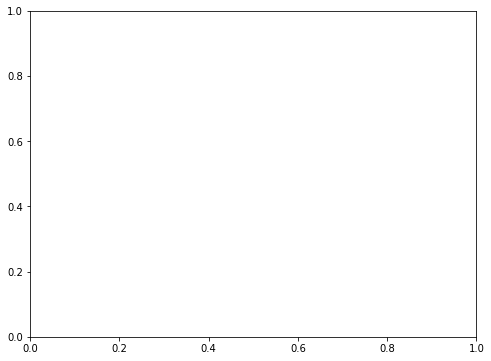

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

What we just did here is to create the two objects figure and axes.
We also specified the size, in inches, that the figure will be characterized by.
This is useful when you will need to save the figure to a file on disk.

As we can see, Matplotlib (together with Jupyter, the renderer for this notebook) gave back a graphical representation of what we have: nothing.
We have to instruct the axes object to put together the vectors `X` and `Y` that we defined above.

In [25]:
ax.plot(X, Y, color='red', linewidth=1.0, linestyle='solid')

Now our plot has the data to be visualized.
However, the axes object has no graphical ability, in the sense that the screen is not showing the plot.
We have to go back to the figure object

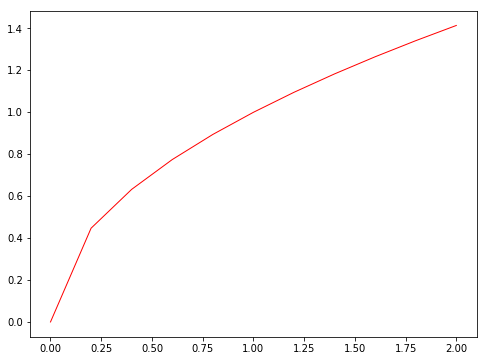

In [26]:
fig

This most certainly resembles the graph of $y=\sqrt{x}$, but it is a bit rough.
This happens because we specified `n = 11` points for the grid for `X`.
To make the graph smoother (hence more appealing to the eyes), we have to recompute the function on a denser set of points.

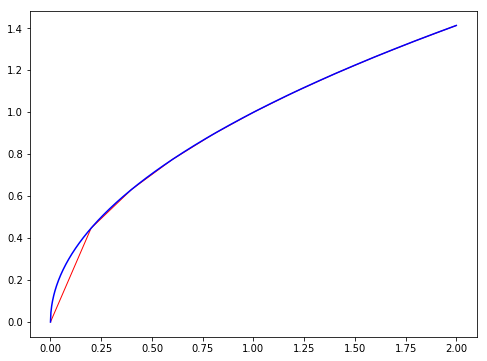

In [27]:
n=1000+1
X = np.linspace(xLo, xHi, n)
Y = np.sqrt(X)

ax.plot(X, Y, color='blue', linewidth=1.5, linestyle='solid')
fig

As we can see, the new blue line is much smoother than the red line, and this happens because we increase the number of points at which we evaluate the function.
Note that the "smoothing" effect is most noticeable where the function is "most concave" (or convex).

We can also decorate the plot by adding axes labels and a title.

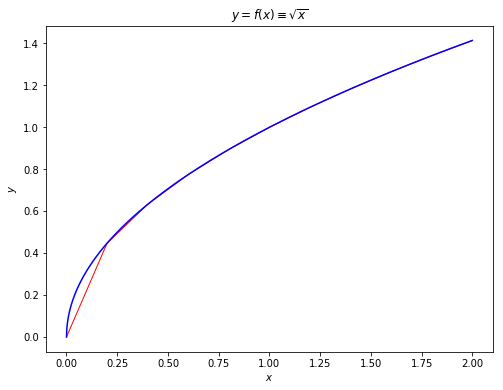

In [28]:
ax.set_xlabel(r'$x$')  # using LaTeX syntax
ax.set_ylabel(r'$y$')  # using LaTeX syntax
ax.set_title(r'$y=f(x)\equiv\sqrt{x}$')  # the 'r' prepending the string escapes backslashes
fig

We can also add arbitrary horizontal and vertical lines, which is useful if we want to highlight specific points in the plot.

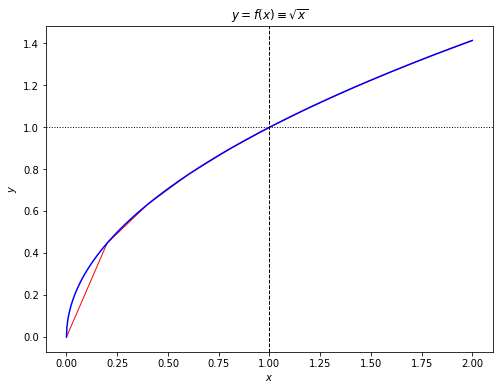

In [29]:
ax.axvline(1, color='black', linestyle='dashed', linewidth=1)
ax.axhline(1, color='black', linestyle='dotted', linewidth=1)
fig

Finally, a notable feature here is saving a figure to disk, which is useful if you want to include the plot in a paper or a slide.
We can do this by using `fig.savefig('destination_folder/filename.extension')`, where `extension` can be PDF, EPS, PNG, JPG, etc.
Matplotlib automatically recognizes the extension (as long as it is a valid and supported graphic format) and takes care of all the encoding necessary.

This is all we need for plotting with Python (at least at the moment).

There is a small catch regarding the use of Matplotlib in conjunction with other tools.
This webpage is generated by a tool call Jupyter.
The interpreter executing the Python commands is called IPython, which is an enhanced command-line (interactive) interpreter that also runs in Spyder (the IDE we use in class).
IPython by default loads special support for graphs, such that the plot is visualized inside the console whenever a figure object is created or called.
This is not standard behavior for Matplotlib alone.
If you are developing code without IPython (most commonly, without Jupyter/Spyder), you can spawn a window containing the plot by using the `plt.show()` command.
This creates a stand-alone window with the plot and pauses the execution of any remaining code after it until the window is closed (unless you use `plt.show(block=False)`, which is still an experimental feature of Matplotlib).



P.s.: do you have LaTeX installed on your machine and want to use LaTeX fonts in your plots for beautiful papers and slides?
Use `matplotlib.rc('text', usetex=True)`.

## Conclusion

We have essentially reconstructed a Matlab-like environment in Python by assembling our own [stack](https://en.wikipedia.org/wiki/Solution_stack).
With Python, we can approximate the behavior of many commercial software packages.
For example, with [Pandas](https://pandas.pydata.org/) and [Statsmodels](http://www.statsmodels.org/stable/) we can get closer to what R or Stata can do.
This shows a bit how flexible Python can be, and presents one argument in favor of using Python as main working tool.

In the next TA sessions we will not focus on Python anymore and we are going to do some Macroeconomics using Python as numerical tool.